In [327]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [328]:
season4 = pd.read_json('/Users/vardja/Documents/Retro-Fireballs/Raw_Data/season4.json')

episode1 = season4['Game Of Thrones S04E01 Two Swords.srt']
episode2 = season4['Game Of Thrones S04E02 The Lion And The Rose.srt']
episode3 = season4['Game Of Thrones S04E03 Breaker Of Chains.srt']
episode4 = season4['Game Of Thrones S04E04 Oathkeeper.srt']
episode5 = season4['Game Of Thrones S04E05 First Of His Name.srt']
episode6 = season4['Game Of Thrones S04E06 The Laws Of Gods And Men.srt']
episode7 = season4['Game Of Thrones S04E07 Mockingbird.srt']
episode8 = season4['Game Of Thrones S04E08 The Mountain And The Viper.srt']
episode9 = season4['Game Of Thrones S04E09 The Watchers On The Wall.srt']
episode10 = season4['Game Of Thrones S04E10 The Children.srt']

all_episodes = [episode1, episode2, episode3, episode4, episode5, episode6, episode7, episode8, episode9, episode10]

In [329]:
compound_list = []
positive_list = []
neutral_list = []
negative_list = []

In [330]:
for episodes in all_episodes:

    # Run Vader Analysis on each Sample
    # Had to turn episodes into str() for VADER analysis
    results = analyzer.polarity_scores(str(episodes))
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]

    # Print Samples and Analysis
    print(episodes)
    print("Compound Score:", compound)
    print("Positive Score:", pos)
    print("Neutral Score:", neu)
    print("Negative Score: ", neg)
    print()
    
    #Puts all information into a list -- aka appends it into a list
    compound_list.append(compound)
    positive_list.append(pos)
    neutral_list.append(neu)
    negative_list.append(neg)

1                              - Magnificent. - Mmm-hmm.
10      You've wanted one in the family for a long time.
100                                   How lovely is she?
101                                           Beautiful.
102                                            But pale.
103    We like them pale in the capital. Shows they d...
104                                   Do I frighten you?
105                                            You like?
106                                      Timid bores me.
107                                                 Hmm.
108                You're a bit of mischief, aren't you?
109                               I think she likes you.
11                         - And now we have two. - Two?
110                                  She has good taste.
111                           You're not timid, are you?
112                                           Not timid.
113                                   Do you like women?
114                    When the

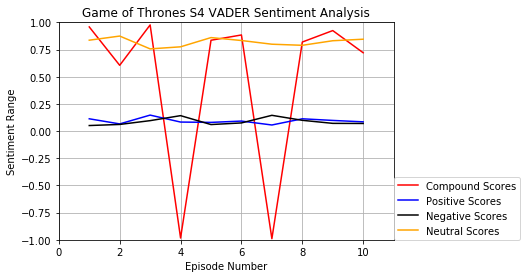

In [362]:
episodes = np.arange(1,11)
compound_label, = plt.plot(episodes, compound_list, color="red", label="Compound Scores")
positive_label, = plt.plot(episodes, positive_list, color="blue", label="Positive Scores")
negative_label, = plt.plot(episodes, negative_list, color="black", label="Negative Scores")
neutral_label, = plt.plot(episodes, neutral_list, color="orange", label="Neutral Scores")

# Add labels to X and Y axes :: Add title
plt.title("Game of Thrones S4 VADER Sentiment Analysis")
plt.xlabel("Episode Number")
plt.ylabel("Sentiment Range")

plt.legend(handles=[compound_label, positive_label, negative_label, neutral_label], loc=(1, 0))

plt.xlim(0, 11)
plt.ylim(-1, 1) 

plt.grid()
plt.show()